# Sample code for evaluation of anipose calibrations

In [1]:
from b06_source.camera_calibration import CalibrationForAnipose3DTracking, SingleCamDataForAnipose, TestPositionsGroundTruth

from pathlib import Path
import matplotlib.pyplot as plt
from b06_source.load_config import read_config
# for creating an interactive 3D plot
#%matplotlib widget

In [2]:
dummy_filepath = Path('random.mp4')
intrinsic_calibrations_dir = Path('test_data/intrinsic_calibrations/')

### To switch between different calibrations, use one of the following paths:
- `'test_data/evaluate_calibration/calibration_00/'`
- `'test_data/evaluate_calibration/calibration_01/'`
- `'test_data/evaluate_calibration/calibration_02/'`

In [3]:
test_data_dir = Path('test_data/evaluate_calibration/calibration_00/')

## Create ground truth of test positions with real-world distances

In [11]:
test_positions = TestPositionsGroundTruth()
test_positions.add_new_marker_id(marker_id='screw1_bottom', other_marker_ids_with_distances=[('screw2_bottom', 5),
                                                                                             ('screw1_top', 8.1),
                                                                                             ('screw1_nut', 6.1),
                                                                                             ('screw3_bottom', 7),
                                                                                             ('screw4_bottom', 10)])

In [12]:
test_positions.add_new_marker_id(marker_id='screw1_nut', other_marker_ids_with_distances=[('screw4_top', 10),
                                                                                          ('screw1_top', 2)])

In [13]:
test_positions.add_new_marker_id(marker_id='screw2_bottom', other_marker_ids_with_distances=[('screw3_bottom', 2),
                                                                                             ('screw4_bottom', 5)])

In [14]:
test_positions.add_new_marker_id(marker_id='screw2_top', other_marker_ids_with_distances=[('screw1_top', 7.7),
                                                                                          ('screw3_top', 1.9)])

In [15]:
test_positions.add_new_marker_id(marker_id='screw3_bottom', other_marker_ids_with_distances=[('screw4_bottom', 3)])

In [16]:
test_positions.add_new_marker_id(marker_id='screw3_top', other_marker_ids_with_distances=[('screw4_top', 4.6)])

In [17]:
test_positions.add_new_marker_id(marker_id='screw4_bottom', other_marker_ids_with_distances=[('screw4_top', 6.1)])

In [18]:
test_positions.add_new_marker_id(marker_id='x1', other_marker_ids_with_distances=[('maze_corner_open_left', 9.4),
                                                                                  ('x2', 16.8)])

In [19]:
test_positions.add_new_marker_id(marker_id='x2', other_marker_ids_with_distances=[('maze_corner_closed_left', 17.4)])

In [20]:
test_positions.add_marker_ids_and_distance_id_as_reference_distance(marker_ids=('screw1_bottom', 'screw4_bottom'), distance_id='screw_1-4_bottoms')

In [21]:
test_positions.add_marker_ids_to_be_connected_in_3d_plots(marker_ids=('screw1_bottom', 'screw4_bottom', 'screw4_top', 'screw1_nut'))

In [4]:
config = read_config("config.yaml")

## Create individual camera objects with intrinsic calibrations & 2D coordinates of detected markers

In [5]:
top_cam = SingleCamDataForAnipose(cam_id = 'Top', filepath_synchronized_calibration_video = dummy_filepath)
top_cam.load_test_position_markers_df_from_dlc_prediction(filepath_deeplabcut_prediction = test_data_dir.joinpath('Top_manual_test_position_marker_fake.h5'))
top_cam.load_intrinsic_camera_calibration(filepath_intrinsic_calibration = intrinsic_calibrations_dir.joinpath('Top_checkerboard_intrinsic_calibration_results.p'))

bottom_cam = SingleCamDataForAnipose(cam_id = 'Bottom', filepath_synchronized_calibration_video = dummy_filepath)
bottom_cam.load_test_position_markers_df_from_dlc_prediction(filepath_deeplabcut_prediction = test_data_dir.joinpath('Bottom_manual_test_position_marker_fake.h5'))
bottom_cam.load_intrinsic_camera_calibration(filepath_intrinsic_calibration = intrinsic_calibrations_dir.joinpath('Bottom_checkerboard_intrinsic_calibration_results.p'))

side1_cam = SingleCamDataForAnipose(cam_id = 'Side1', filepath_synchronized_calibration_video = dummy_filepath)
side1_cam.load_test_position_markers_df_from_dlc_prediction(filepath_deeplabcut_prediction = test_data_dir.joinpath('Side1_manual_test_position_marker_fake.h5'))
side1_cam.load_intrinsic_camera_calibration(filepath_intrinsic_calibration = intrinsic_calibrations_dir.joinpath('Side1_checkerboard_intrinsic_calibration_results.p'))

side2_cam = SingleCamDataForAnipose(cam_id = 'Side2', filepath_synchronized_calibration_video = dummy_filepath)
side2_cam.load_test_position_markers_df_from_dlc_prediction(filepath_deeplabcut_prediction = test_data_dir.joinpath('Side2_manual_test_position_marker_fake.h5'))
side2_cam.load_intrinsic_camera_calibration(filepath_intrinsic_calibration = intrinsic_calibrations_dir.joinpath('Side2_checkerboard_intrinsic_calibration_results.p'))

ground1_cam = SingleCamDataForAnipose(cam_id = 'Ground1', filepath_synchronized_calibration_video = dummy_filepath)
ground1_cam.load_test_position_markers_df_from_dlc_prediction(filepath_deeplabcut_prediction = test_data_dir.joinpath('Ground1_manual_test_position_marker_fake.h5'))
ground1_cam.load_intrinsic_camera_calibration(filepath_intrinsic_calibration = intrinsic_calibrations_dir.joinpath('Ground1_checkerboard_intrinsic_calibration_results.p'))

ground2_cam = SingleCamDataForAnipose(cam_id = 'Ground2', filepath_synchronized_calibration_video = dummy_filepath)
ground2_cam.load_test_position_markers_df_from_dlc_prediction(filepath_deeplabcut_prediction = test_data_dir.joinpath('Ground2_manual_test_position_marker_fake.h5'))
ground2_cam.load_intrinsic_camera_calibration(filepath_intrinsic_calibration = intrinsic_calibrations_dir.joinpath('Ground2_checkerboard_intrinsic_calibration_results.p'))

single_cams = [bottom_cam, ground1_cam, ground2_cam, side1_cam, side2_cam, top_cam]

User info: since no other information were provided, "cropping_offsets" were set to the corresponding default values: (0, 0).
User info: since no other information were provided, "flipped_horizontally" & "flipped_vertically" were set to the corresponding default values: False.
User info: since no other information were provided, "degrees_rotated_clockwise" were set to the corresponding default values: 0.
User info: since no other information were provided, "cropping_offsets" were set to the corresponding default values: (0, 0).
User info: since no other information were provided, "flipped_horizontally" & "flipped_vertically" were set to the corresponding default values: False.
User info: since no other information were provided, "degrees_rotated_clockwise" were set to the corresponding default values: 0.
User info: since no other information were provided, "cropping_offsets" were set to the corresponding default values: (0, 0).
User info: since no other information were provided, "flip

## Load calibration, triangulate markers & plot

In [6]:
anipose_calibration = CalibrationForAnipose3DTracking(single_cams_to_calibrate = single_cams)

In [7]:
anipose_calibration.load_calibration(filepath = test_data_dir.joinpath('anipose_calibration_all_cams.toml'))
anipose_calibration.evaluate_triangulation_of_test_position_markers(config)

100%|█████████████████████████████████| 15/15 [00:01<00:00, 10.65it/s]


   maze_corner_closed_left_x  maze_corner_closed_left_y  \
0                   5.104463                  -3.255364   

   maze_corner_closed_left_z  maze_corner_closed_left_error  \
0                  65.362136                     232.572065   

   maze_corner_closed_left_score  maze_corner_closed_right_x  \
0                          0.999                    6.627984   

   maze_corner_closed_right_y  maze_corner_closed_right_z  \
0                   -1.301194                   64.054527   

   maze_corner_closed_right_error  maze_corner_closed_right_score  ...  M_10  \
0                      216.467742                           0.999  ...   0.0   

   M_11  M_12  M_20  M_21  M_22  center_0  center_1  center_2  fnum  
0   1.0   0.0   0.0   0.0   1.0       0.0       0.0       0.0     0  

[1 rows x 88 columns]


AttributeError: 'list' object has no attribute 'items'

In [8]:
anipose_calibration.anipose_io["df_xyz"]

,maze_corner_closed_left_x,maze_corner_closed_left_y,maze_corner_closed_left_z,maze_corner_closed_left_error,maze_corner_closed_left_score,maze_corner_closed_right_x,maze_corner_closed_right_y,maze_corner_closed_right_z,maze_corner_closed_right_error,maze_corner_closed_right_score,...,M_10,M_11,M_12,M_20,M_21,M_22,center_0,center_1,center_2,fnum
0,5.104463,-3.255364,65.362136,232.572065,0.999,6.627984,-1.301194,64.054527,216.467742,0.999,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [9]:
anipose_calibration.set_distances_from_configuration(config["distances"])

   maze_corner_closed_left_x  maze_corner_closed_left_y  \
0                   5.104463                  -3.255364   

   maze_corner_closed_left_z  maze_corner_closed_left_error  \
0                  65.362136                     232.572065   

   maze_corner_closed_left_score  maze_corner_closed_right_x  \
0                          0.999                    6.627984   

   maze_corner_closed_right_y  maze_corner_closed_right_z  \
0                   -1.301194                   64.054527   

   maze_corner_closed_right_error  maze_corner_closed_right_score  ...  M_10  \
0                      216.467742                           0.999  ...   0.0   

   M_11  M_12  M_20  M_21  M_22  center_0  center_1  center_2  fnum  
0   1.0   0.0   0.0   0.0   1.0       0.0       0.0       0.0     0  

[1 rows x 88 columns]


In [10]:
anipose_calibration.anipose_io["distances_in_cm"]

{'screw1_bottom_screw2_bottom': {'maze_corner_closed_left': {'maze_corner_closed_right': 0    14.099375
   dtype: float64,
   'maze_corner_open_left': 0    54.675928
   dtype: float64,
   'maze_corner_open_right': 0    70.459026
   dtype: float64,
   'screw1_top': 0    58.590071
   dtype: float64,
   'screw1_nut': 0    59.970873
   dtype: float64,
   'screw2_top': 0    60.202649
   dtype: float64,
   'screw3_top': 0    60.145872
   dtype: float64,
   'screw4_top': 0    46.542417
   dtype: float64,
   'x1': 0    50.852787
   dtype: float64,
   'x2': 0    43.963602
   dtype: float64,
   'screw1_bottom': 0    69.209347
   dtype: float64,
   'screw2_bottom': 0    66.53235
   dtype: float64,
   'screw3_bottom': 0    65.279586
   dtype: float64,
   'screw4_bottom': 0    61.734761
   dtype: float64},
  'maze_corner_closed_right': {'maze_corner_open_left': 0    53.012338
   dtype: float64,
   'maze_corner_open_right': 0    67.73912
   dtype: float64,
   'screw1_top': 0    55.79973
   dtype: fl

In [11]:
config["angles"]

[{'maze_corner_open_left': 90,
  'marker': ['maze_corner_open_left',
   'maze_corner_open_right',
   'maze_corner_closed_left']},
 {'maze_corner_open_right': 90,
  'marker': ['maze_corner_open_right',
   'maze_corner_open_left',
   'maze_corner_closed_right']},
 {'maze_corner_closed_left': 90,
  'marker': ['maze_corner_closed_left',
   'maze_corner_closed_right',
   'maze_corner_open_left']},
 {'maze_corner_closed_right': 90,
  'marker': ['maze_corner_closed_right',
   'maze_corner_closed_left',
   'maze_corner_open_right']},
 {'screw_1': 90,
  'marker': ['screw1_bottom',
   'screw1_top',
   'maze_corner_closed_right',
   'maze_corner_closed_left',
   'maze_corner_open_right']},
 {'screw_2': 90,
  'marker': ['screw2_bottom',
   'screw2_top',
   'maze_corner_closed_right',
   'maze_corner_closed_left',
   'maze_corner_open_right']},
 {'screw_3': 90,
  'marker': ['screw3_bottom',
   'screw3_top',
   'maze_corner_closed_right',
   'maze_corner_closed_left',
   'maze_corner_open_right']},


100%|█████████████████████████████████| 15/15 [00:01<00:00,  9.93it/s]


Mean reprojection error: 314.54802109041646
Using maze_length_left as reference distance, the mean distance error is: -4.852514175866671 cm.
Using maze_length_right as reference distance, the mean distance error is: -1.1462954605534663 cm.
Using screw_1-4_bottoms as reference distance, the mean distance error is: -9.529246202214395 cm.


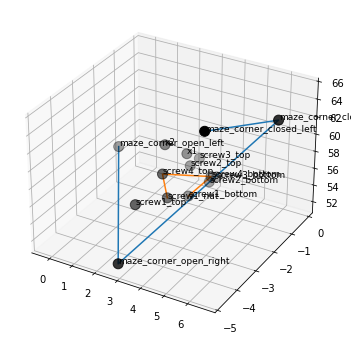

In [21]:
anipose_calibration.evaluate_triangulation_of_test_position_markers(test_positions_gt = test_positions)

In [22]:
# additional function to check angles:
anipose_calibration.run_calibration_control()

Maze tilted?:

Angle at open right: 34.38682863291515
Angle at open left: 102.05010710856357
Angle at closed right: 95.11370573719218
Angle at closed left: 86.26188890372902


Angle of objects on the maze:
Angle screw1: 48.995348569099704
Angle screw2: 81.02714834904117
Angle screw3: 86.38609787776912
Angle screw4: 60.547368635349486

Distance of X1 and X2:
Distance X1 to maze: 1.332492378267646
Distance X2 to maze: 0.7414160460088346



## Where you find the data:

### 1) x,y,z coordinates of triangulated markers in unitless space:

In [23]:
anipose_calibration.anipose_io['df_xyz']

,maze_corner_closed_left_x,maze_corner_closed_left_y,maze_corner_closed_left_z,maze_corner_closed_left_error,maze_corner_closed_left_score,maze_corner_closed_right_x,maze_corner_closed_right_y,maze_corner_closed_right_z,maze_corner_closed_right_error,maze_corner_closed_right_score,...,M_10,M_11,M_12,M_20,M_21,M_22,center_0,center_1,center_2,fnum
0,5.104463,-3.255364,65.362136,232.572065,0.999,6.627984,-1.301194,64.054527,216.467742,0.999,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


### 2) ground truth distances between markers in cm:

In [ ]:
test_positions.marker_ids_with_distances